In [1]:
import numpy as np  
from scipy.integrate import tplquad,dblquad,quad
from scipy import integrate
import matplotlib.pyplot as plt


In [2]:
rho0b=100 #M_sun/pc^3
r0=75 #pc
r_cut=2.1e3 #pc
q=0.5

def rho_b(x,y):
    return rho0b*np.exp(-(np.sqrt(x**2+(y/q)**2)/r_cut)**2)/(1+np.sqrt(x**2+(y/q)**2)/r0)**1.8

def rho_b1(x,y):
    return rho_b(x,y)*2*np.pi*x #柱坐标积分*2π，之后的就直接乘到density里面了

Sigma0thin=731
z_dthin=300
r_dthin=2.5e3
def rho_dthin(x,y):
    return Sigma0thin*np.exp(-(np.abs(y)/z_dthin-x/r_dthin))/2/z_dthin*2*np.pi*x


Sigma0thik=101
z_dthik=900
r_dthik=3.5e3
def rho_dthik(x,y):
    return 2*np.pi*x*Sigma0thik*np.exp(-(np.abs(y)/z_dthik-x/r_dthik))/2/z_dthik

Sigma0h1=53
z_dh1=85
r_mh1=4e3
r_dh1=7e3
def rho_dh1(x,y):
    return 2*np.pi*x*Sigma0h1*np.exp(-(r_mh1/x-x/r_dh1))/z_dh1/(np.exp(y/2/z_dh1)+np.exp(-y/2/z_dh1))**2

Sigma0h2=2200
z_dh2=45
r_mh2=12e3
r_dh2=1.5e3
def rho_dh2(x,y):
    return 2*np.pi*x*Sigma0h2*np.exp(-(r_mh2/x-x/r_dh2))/z_dh2/(np.exp(y/2/z_dh2)+np.exp(-y/2/z_dh2))**2



rho_cri=1.06e-26
f_bar=0.3
R_200=218e3
def rho_cgm(x):
    return 2*np.pi*x*200*rho_cri*0.19*f_bar*(x/R_200)**(-1.46)
M_cgm=np.array([])
for i in range (1,21800):
    M_cgm0,errb=quad(rho_cgm,0,i)
    M_cgm=np.append(M_cgm,M_cgm0)

In [3]:
M_b=np.array([])
for i in range(1,2100):
    M_b0,errb=dblquad(rho_b1,0,i,lambda x:0,10)
    M_b=np.append(M_b,M_b0)
    

    
    


In [4]:
M_dthin=np.array([])
for i in range(1,2500):
    M_dthin0,errb=dblquad(rho_dthin,0,i,lambda x:0,300)
    M_dthin=np.append(M_dthin,M_dthin0)
    

    
M_dthik=np.array([])
for i in range(1,3500):
    M_dthik0,errb=dblquad(rho_dthik,0,i,lambda x:0,900)
    M_dthik=np.append(M_dthik,M_dthik0)
    
    
    
    
M_dh1=np.array([])
for i in range(1,7000):
    M_dh10,errb=dblquad(rho_dh1,0,i,lambda x:0,85)
    M_dh1=np.append(M_dh1,M_dh10)
    
    
    
    
M_dh2=np.array([])
for i in range(1,1500):
    M_dh20,errb=dblquad(rho_dh2,0,i,lambda x:0,45)
    M_dh2=np.append(M_dh2,M_dh20)
    

    

    
    


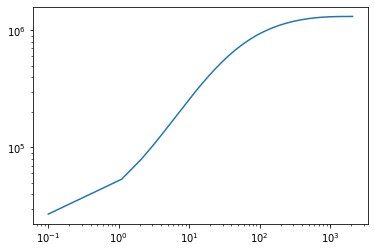

In [5]:
r1=np.linspace(0.1,2100,2099)
plt.loglog(r1,M_b)


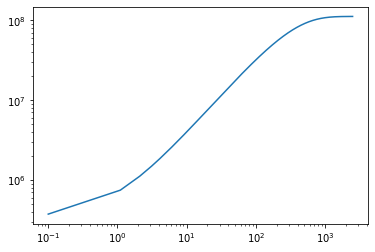

In [6]:
r2=np.linspace(0.1,2500,2499)
plt.loglog(r2,M_dthin)


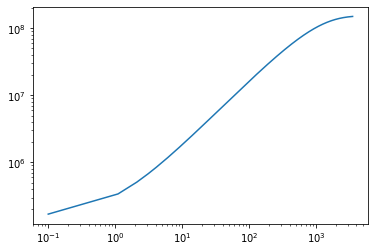

In [7]:
r3=np.linspace(0.1,3500,3499)
plt.loglog(r3,M_dthik)


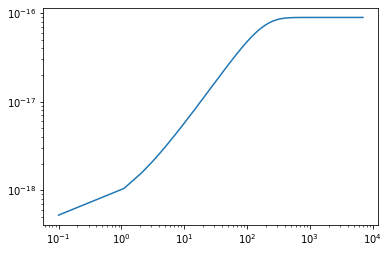

In [8]:
r4=np.linspace(0.1,7000,6999)
plt.loglog(r4,M_dh1)


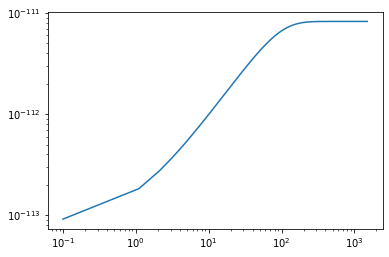

In [9]:
r5=np.linspace(0.1,1500,1499)
plt.loglog(r5,M_dh2)


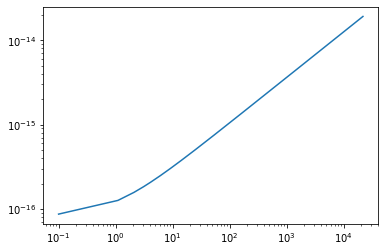

In [10]:
r6=np.linspace(0.1,21800,21799)
plt.loglog(r6,M_cgm)

In [12]:
Mb=np.append(M_b,np.zeros(19700))
Mdthin=np.append(M_dthin,np.zeros(19300))
Mdthik=np.append(M_dthik,np.zeros(18300))
Mdh1=np.append(M_dh1,np.zeros(14800))
Mdh2=np.append(M_dh2,np.zeros(20300))

In [13]:
M_btot=(Mb+Mdthin+Mdthik+Mdh2+Mdh1+M_cgm)/1000


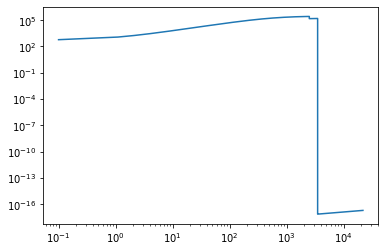

In [14]:
plt.loglog(r6,M_btot)

In [17]:
M_btot[0]

569.3266468217249

/Users/zkw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/Users/zkw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in double_scalars


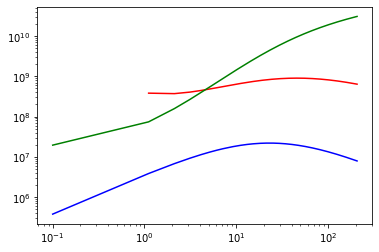

In [21]:
M_200=0.82e12 #M_sun
R_200=207 #kpc

r=np.linspace(0,R_200,100)
Omega_m=0.307
Omega_b=0.048
f_b=Omega_b/Omega_m


#contracted total mass profile
M_tot0=1.08e12 #M_sun

#def M_r(x):
 #   return M_tot0*4*np.pi*x**3/3/R_200**3

c1=9
R_s=R_200/c1
# NFW profile without correction
def rho(c,x):
    rho_r=M_200/(4*np.pi*R_200**3)*c**3*R_s**2/(np.log(1+c)-c/(1+c))/(x*(x+R_200/c)**2)
    return rho_r
rho_r=rho(c1,r)


# DMO mass within radius r
def integrand(x,a,b):
    return a*4*np.pi*x**2/(x*(x+b)**2)



a=M_200/(4*np.pi*R_200**3)*c1**3*R_s**2/(np.log(1+c1)-c1/(1+c1))
b=R_200/c1

#def M_DMO(x):
  #  return (a*((b+x)*math.log(x,10)-(b+x)*math.log(b+x,10)))/(b**2*(b+x))

M_DM=np.array([])

#DM mass within radius r with correction
for r1 in range (1,R_200):

    M_DMO=quad(integrand,0.01,r1,args=(a,b))
    M_tot=M_DMO[0]/(1-f_b)
    #print (M_DMO(r1))

    ita_bar=M_btot[r1-1]/M_tot

    M_DM1=M_DMO[0]*(0.45+0.38*(ita_bar+1.16)**0.53)
    M_DM=np.append(M_DM,M_DM1)
    
def rho_cDM(x):
    return M_DM[x]*4*np.pi/3/x**3
rho_cDMr=np.array([])
for r3 in range (1,R_200):
    rho_cDMr1=rho_cDM(r3-1)
    rho_cDMr=np.append(rho_cDMr,rho_cDMr1)

r2=np.linspace(0.1,R_200,206)
plt.loglog(r2,rho_cDMr*r2**2,'r')
plt.loglog(r2,rho(c1,r2)*r2**2,'b')
plt.loglog(r2,M_DM,'g')
#plt.xlabel('r [kpc]')
#plt.ylabel('M_DM [M_sun]')